<a href="https://colab.research.google.com/github/antra111/DiabetesPredictionML/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION USING ML**

**Selection of Dataset**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv('/content/drive/MyDrive/Antra/Projects/diabetes (1).csv')

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Exploring Dataset** 

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Cleaning**

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

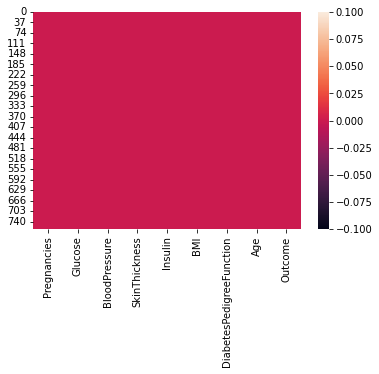

In [11]:
sns.heatmap(data.isnull())

In [13]:
data1=data.drop(['Pregnancies'],axis=1)

In [16]:
data1.head(n=0)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Data Visualisation**

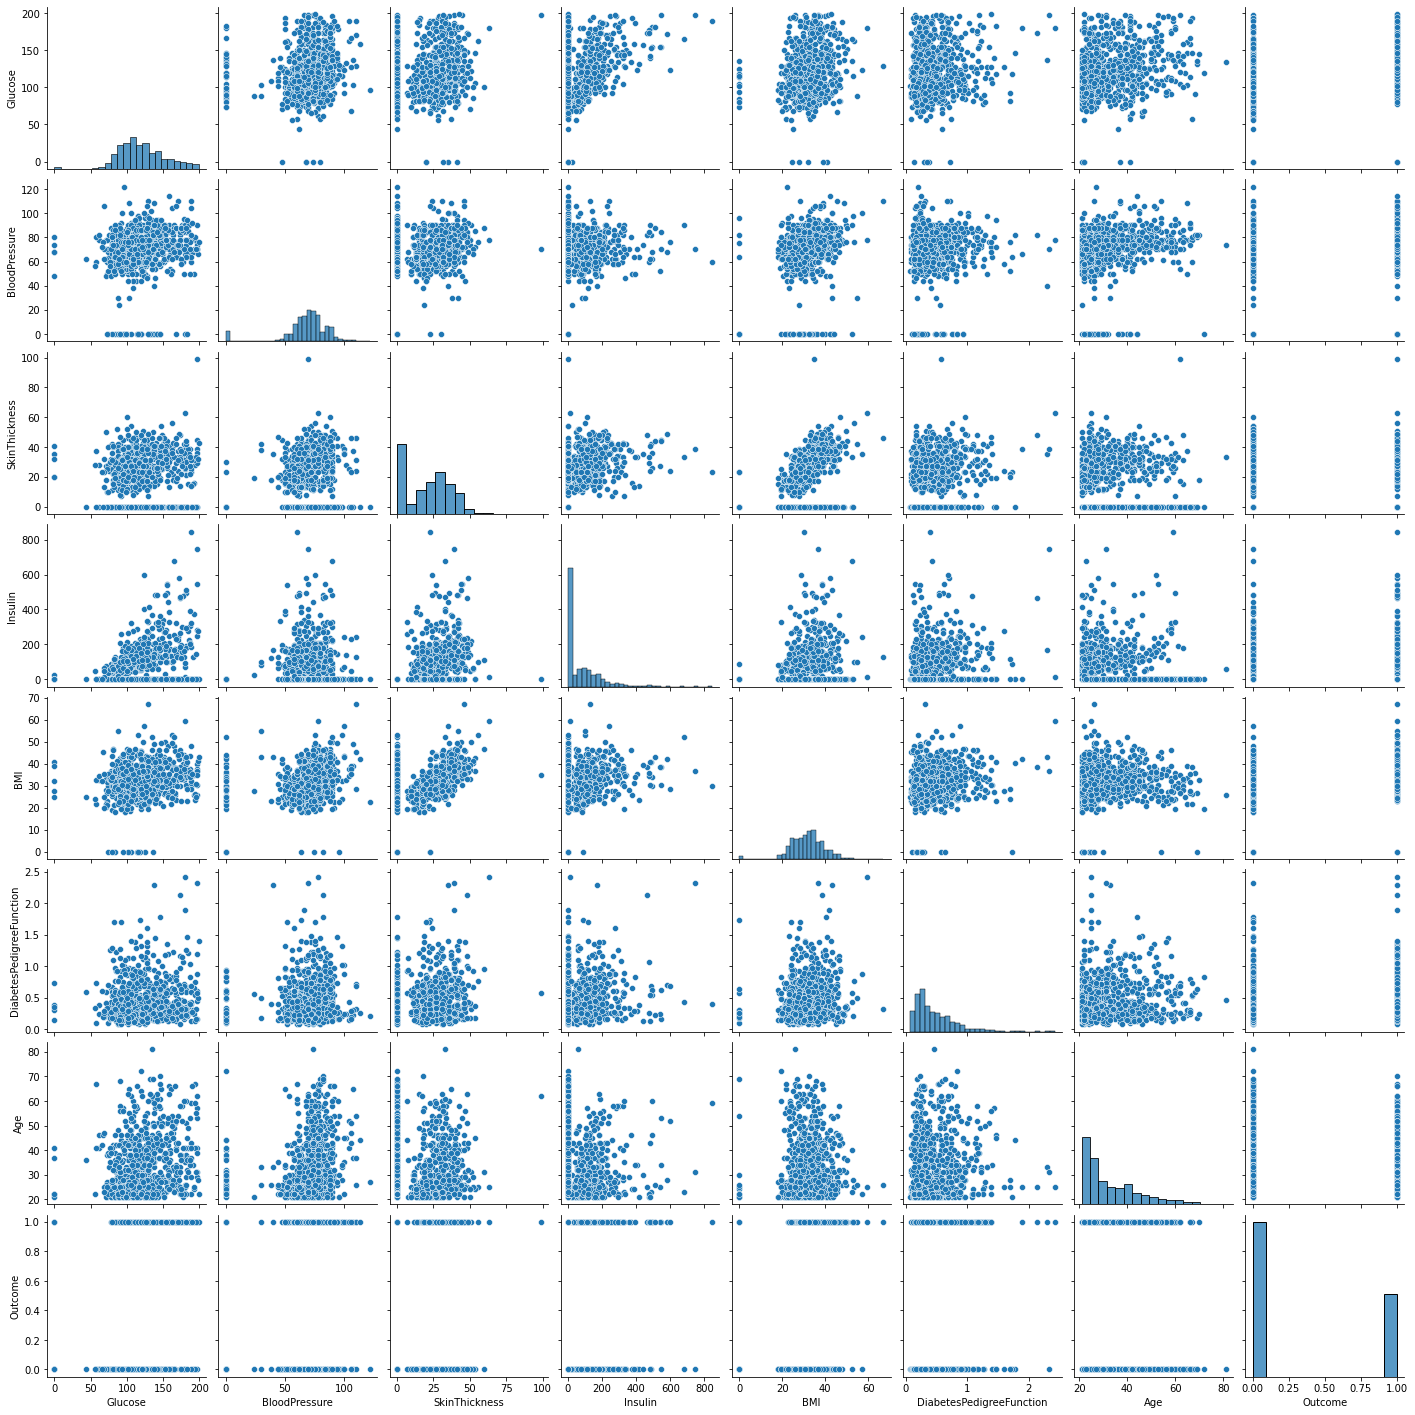

In [18]:
sns.pairplot(data1)

**Selection of Independent and Dependent Data**

In [19]:
X=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age']]

In [20]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [21]:
Y=data1[['Outcome']]

In [22]:
Y.head(n=3)

,Outcome
0,1
1,0
2,1


**Spliting of Data**

In [23]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.008,random_state=0)

In [31]:
X_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,199,76,43,0,42.9,1.394,22
122,107,74,30,100,33.6,0.404,23
113,76,62,0,0,34.0,0.391,25
14,166,72,19,175,25.8,0.587,51
529,111,65,0,0,24.6,0.660,31
103,81,72,18,40,26.6,0.283,24
338,152,78,34,171,34.2,0.893,33


**Model Selection**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
ABC=LogisticRegression()

In [34]:
ABC.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
print(X_test)

     Glucose  BloodPressure  SkinThickness  ...   BMI  DiabetesPedigreeFunction  Age
661      199             76             43  ...  42.9                     1.394   22
122      107             74             30  ...  33.6                     0.404   23
113       76             62              0  ...  34.0                     0.391   25
14       166             72             19  ...  25.8                     0.587   51
529      111             65              0  ...  24.6                     0.660   31
103       81             72             18  ...  26.6                     0.283   24
338      152             78             34  ...  34.2                     0.893   33

[7 rows x 7 columns]


In [36]:
print(Y_test)

     Outcome
661        1
122        0
113        0
14         1
529        0
103        0
338        1


In [37]:
y_pred=ABC.predict(X_test)

In [38]:
print(X_test)

     Glucose  BloodPressure  SkinThickness  ...   BMI  DiabetesPedigreeFunction  Age
661      199             76             43  ...  42.9                     1.394   22
122      107             74             30  ...  33.6                     0.404   23
113       76             62              0  ...  34.0                     0.391   25
14       166             72             19  ...  25.8                     0.587   51
529      111             65              0  ...  24.6                     0.660   31
103       81             72             18  ...  26.6                     0.283   24
338      152             78             34  ...  34.2                     0.893   33

[7 rows x 7 columns]


In [39]:
print(y_pred)

[1 0 0 1 0 0 1]


In [40]:
print(Y_test)

     Outcome
661        1
122        0
113        0
14         1
529        0
103        0
338        1


**Model Evaluation**

In [41]:
from sklearn.metrics import r2_score

In [42]:
print('MY MODEL ACCURRACY IS: ',r2_score(Y_test,y_pred)*100)

MY MODEL ACCURRACY IS:  100.0


**Model Predictions**

In [47]:
a=['A']
df=pd.DataFrame({'Glucose':160,'BloodPressure':80,'SkinThickness':25,'Insulin':100,'BMI':48.9,'DiabetesPedigreeFunction':0.548,'Age':60},index=a)

In [48]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
A,160,80,25,100,48.9,0.548,60


In [49]:
new_pred=ABC.predict(df)
if new_pred>0.5:
  print('THE PATIENT IS SUFFERING FROM DIABETES.')
else:
  print('THE PATIENT IS NOT SUFFERING FROM DIABETES.')

THE PATIENT IS SUFFERING FROM DIABETES.
